In [16]:
import json
import bz2
import os
import csv
import datetime
from bz2 import BZ2File
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pathToData = "data/"
pathToJson = "jsonl_created/" 
pathToBz2 = "ourCorpusBZ2/"
files_to_read = os.listdir(pathToData)
files_to_read

['GDL-1958.jsonl.bz2', 'GDL-1959.jsonl.bz2', 'GDL-1960.jsonl.bz2']

In [11]:
# a helper function to get the lines from am archive
def read_jsonlines(bz2_file):
    text = bz2_file.read().decode('utf-8')
    for line in text.split('\n'):
        if line != '':
            yield line

In [13]:
def createOurCorpus():
    #From the big corpus to our corpus in json.bz2
    nb =1
    count =0
    returntxt = open("txtname.txt", "w+")
    for file in files_to_read:
        filename = file[0:14]
        with open("jsonl_created/"+filename, 'w') as outfile:  

            print(file)
            print(" " + str(nb) + "/"+ str(len(files_to_read)))
            text_article = ""
            #open the file 
            f = BZ2File(os.path.join(pathToData, file), 'r')
            # get the list of articles it contains (= a json object on each line)
            articles = list(read_jsonlines(f))
            # load the first 100 articles as json and access their attributes
            for a in articles:
                # decode the json string into an object (dict)
                json_article = json.loads(a)
                jsonString = {}

                ### Change here the keyword to search for (can add more than one connected with AND / OR)
                if "apartheid" in json_article["ft"].lower(): ### expression régulière pour checker ca
                    text_article = text_article + " \n**** *id:" + str(count) + " *from:" + file + "  \n " + json_article["ft"]
                    jsonString = {'id' : str(count), 'd' : json_article["d"], 'ft' : json_article["ft"]}
                    json.dump(jsonString, outfile)
                    outfile.write('\n')
                    count += 1
            returntxt.write(text_article)
            nb = nb + 1 
        f = bz2.compress(open(pathToJson + filename, 'rb').read())
        fh = open(pathToBz2 + filename + "A.bz2", 'wb')
        fh.write(f)
        fh.close()
    returntxt.close()

In [14]:
createOurCorpus()

GDL-1958.jsonl.bz2
 1/3
GDL-1959.jsonl.bz2
 2/3
GDL-1960.jsonl.bz2
 3/3


In [19]:
files_to_read = os.listdir(pathToBz2)
files_to_read

['GDL-1958.jsonlA.bz2', 'GDL-1959.jsonlA.bz2', 'GDL-1960.jsonlA.bz2']

In [20]:
### y: year, m: month, d: day, deltap: the delta from dateEvent to max in days, deltan: the delta to dateEvent from min in days
### dateEventstring: date of the event we want to look at.
def csvtxtwriter(csvname, y, m, d, deltap, deltan, dateEventstring):
    nb =0
    count =0
    dateMax = datetime.timedelta(days=deltap)
    dateMin = datetime.timedelta(days = deltan)
    dateEvent = datetime.datetime.strptime(dateEventstring, '%Y-%m-%d')
    text_articletxt = ""
    with open(csvname, 'w', newline='') as csvFinal:
        linewriter = csv.writer(csvFinal, delimiter = '*')
        linewriter.writerow(["id", "date"])
        print(files_to_read)
        for file in files_to_read:
            nb +=1
            print(file)
            print(" " + str(nb) + "/"+ str(len(files_to_read)))
            #open the file 
            f = BZ2File(os.path.join(pathToBz2, file), 'r')
            # get the list of articles it contains (= a json object on each line)
            articles = list(read_jsonlines(f))
            # load the first 100 articles as json and access their attributes

            for a in articles[:100]:
                # decode the json string into an object (dict)
                json_article = json.loads(a)
                datearticle = datetime.datetime.strptime(json_article["d"], '%Y-%m-%d')
                if ((datearticle - dateEvent < dateMax) and (datearticle - dateEvent > dateMin)) :
                    linewriter.writerow([str(count), json_article["d"][:7]]) ###if we want groupbyday: remove [:7]
                    count += 1

In [24]:
csvtxtwriter("text1.csv", 1959, 6, 29, 150, -308, "1960-01-12")

['GDL-1958.jsonlA.bz2', 'GDL-1959.jsonlA.bz2', 'GDL-1960.jsonlA.bz2']
GDL-1958.jsonlA.bz2
 1/3
GDL-1959.jsonlA.bz2
 2/3
GDL-1960.jsonlA.bz2
 3/3


In [25]:
def fromCSVtoGraph(csvname):
    a = pd.read_csv(csvname, delimiter='*')
    futurG = a.groupby(['date']).count().sort_values(by='date')
    ax = futurG.plot(kind='bar')
    ax.legend(["Occurences"]);
    return ax

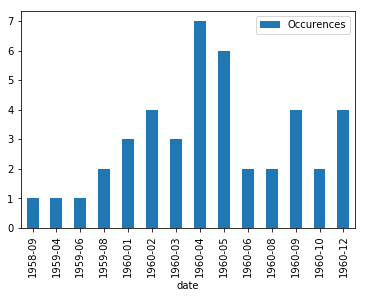

In [26]:
fromCSVtoGraph('text1.csv')

In [ ]:
a = pd.read_csv('text1.csv', delimiter='*')


In [ ]:
a

In [ ]:
futurG = a.groupby(['date']).count().sort_values(by='date')

In [ ]:
futurG

In [ ]:
ax = futurG.plot(kind='bar')
ax.legend(["Occurences"]);